In [27]:
# !pip install sklearn
!pip install xgboost

     |████████████████████████████████| 1.2 MB 3.1 MB/s eta 0:00:01


In [1]:
from sklearn import linear_model
import xgboost

In [59]:
from sklearn.datasets import load_boston,load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
diabetesdata=load_boston()
X,y=pd.DataFrame(diabetesdata.data,columns=diabetesdata.feature_names),pd.DataFrame(diabetesdata.target)

In [61]:
# Convert data to make it kosher for sagemaker
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.33)


In [62]:
linear_model.LinearRegression()

LinearRegression()

In [63]:
lin=linear_model.LinearRegression()

In [64]:
lin.fit(X_train,y_train)

LinearRegression()

In [65]:
np.sqrt(mse(lin.predict(X_test),y_test))

5.610203844074748

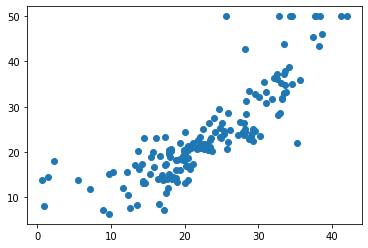

In [66]:
plt.scatter(pd.DataFrame(lin.predict(X_test)),y_test)

In [83]:
lin.coef_

array([[-1.19184031e-01,  4.54572354e-02, -9.67813910e-02,
         2.08626402e+00, -1.49731835e+01,  2.63098518e+00,
         1.21432484e-02, -1.35234420e+00,  3.84355654e-01,
        -1.22884097e-02, -8.53397180e-01,  6.47854278e-03,
        -6.34991325e-01]])

In [67]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import ElasticNet

In [68]:
randomforest=RandomForestRegressor()

In [69]:
randomforest.fit(X_train,y_train)

<ipython-input-69-f905b2ccb91e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest.fit(X_train,y_train)


RandomForestRegressor()

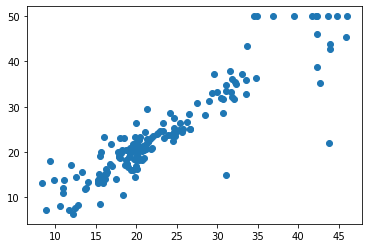

In [70]:
plt.scatter(pd.DataFrame(randomforest.predict(X_test)),y_test)

In [71]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score

In [72]:
np.sqrt(mse(randomforest.predict(X_test),y_test))

4.330023873203817

In [73]:
net = ElasticNet(alpha = 0.001)
net.fit(X_train, y_train)

ElasticNet(alpha=0.001)

In [74]:
np.sqrt(mse(net.predict(X_test),y_test))

5.634472627463623

In [75]:
from xgboost import XGBRegressor

In [76]:
xgb=XGBRegressor()

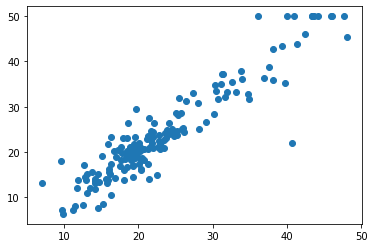

In [77]:
xgb.fit(X_train,y_train)
plt.scatter(pd.DataFrame(xgb.predict(X_test)),y_test)

In [78]:
np.sqrt(mse(xgb.predict(X_test),y_test))

3.8389936515375576

In [79]:
scores = cross_val_score(XGBRegressor(objective='reg:squarederror'), X, y, scoring='neg_mean_squared_error')
(-scores)**0.5

array([3.02872499, 3.70726737, 3.73516233, 6.4632116 , 4.32205432])

In [80]:
((-scores)**0.5).mean()

4.251284120598137

In [85]:
a=np.array([1,2,3])

In [90]:
b=np.stack((a,a),axis=1)

In [91]:
b

array([[1, 1],
       [2, 2],
       [3, 3]])

In [92]:
b.shape

(3, 2)